In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [2]:
whale_returns_csv = Path("../Resources/whale_returns.csv")
whale_daily_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
whale_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
whale_daily_returns.dropna(inplace=True)

In [5]:
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo_daily_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_daily_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
algo_daily_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
algo_daily_returns.dropna(inplace=True)

In [8]:
sp500_returns_csv = Path("../Resources/sp500_history.csv")
sp500_returns_df = pd.read_csv(sp500_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_returns_df = sp500_returns_df.sort_index()
sp500_returns_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
sp500_returns_df.dtypes

Close    object
dtype: object

In [10]:
sp500_returns_df["Close"] = sp500_returns_df["Close"].str.replace("$", "") 
sp500_returns_df["Close"] = sp500_returns_df["Close"].astype("float") 


C:\Users\19546\AppData\Local\Temp\ipykernel_17412\2238472144.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_returns_df["Close"] = sp500_returns_df["Close"].str.replace("$", "")


In [11]:
sp500_daily_returns = sp500_returns_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
#sp500_daily_returns.isnull().sum()
sp500_daily_returns = sp500_daily_returns.dropna().copy()
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close":"SP 500"})
sp500_daily_returns

,SP 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
#Combine Whale, Algorithmic, and S&P 500 Returns
all_portfolio = pd.concat([whale_daily_returns, algo_daily_returns, sp500_daily_returns], axis = "columns", join = "inner")
all_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


<Axes: xlabel='Date'>

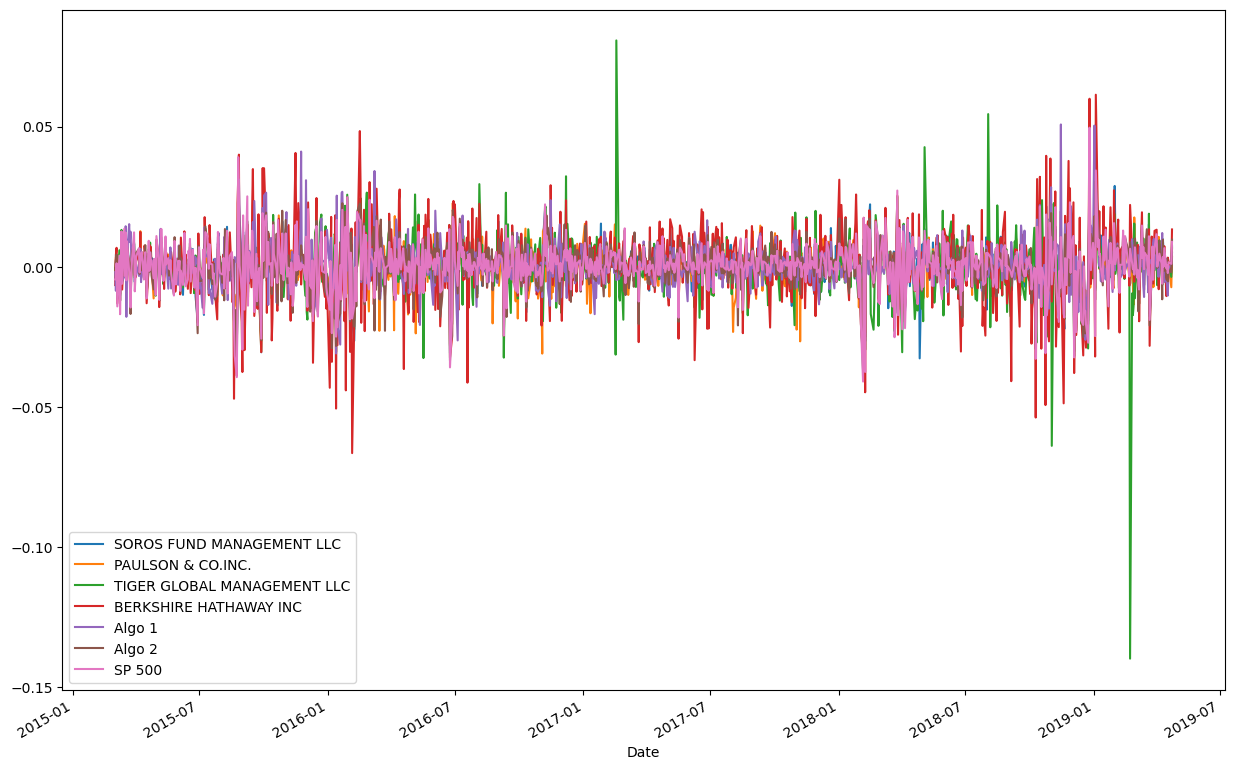

In [46]:
#Conduct Quantitative Analysis
#In this section, you will calculate and visualize performance and risk metrics for the portfolios.

#Performance Anlysis
#Calculate and Plot the daily returns.
# Plot daily returns of all portfolios
all_portfolio.plot(figsize=(15,10))

<Axes: xlabel='Date'>

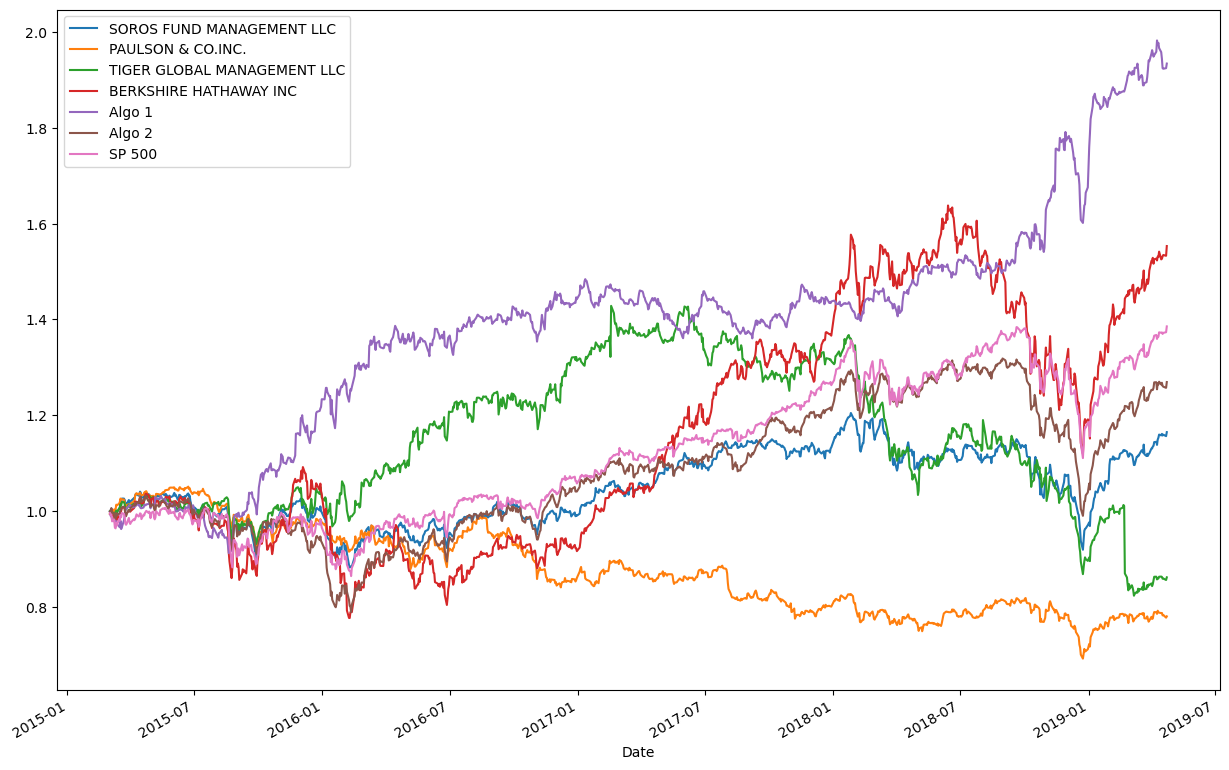

In [47]:
#Calculate and Plot cumulative returns.
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+all_portfolio).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10))

<Axes: >

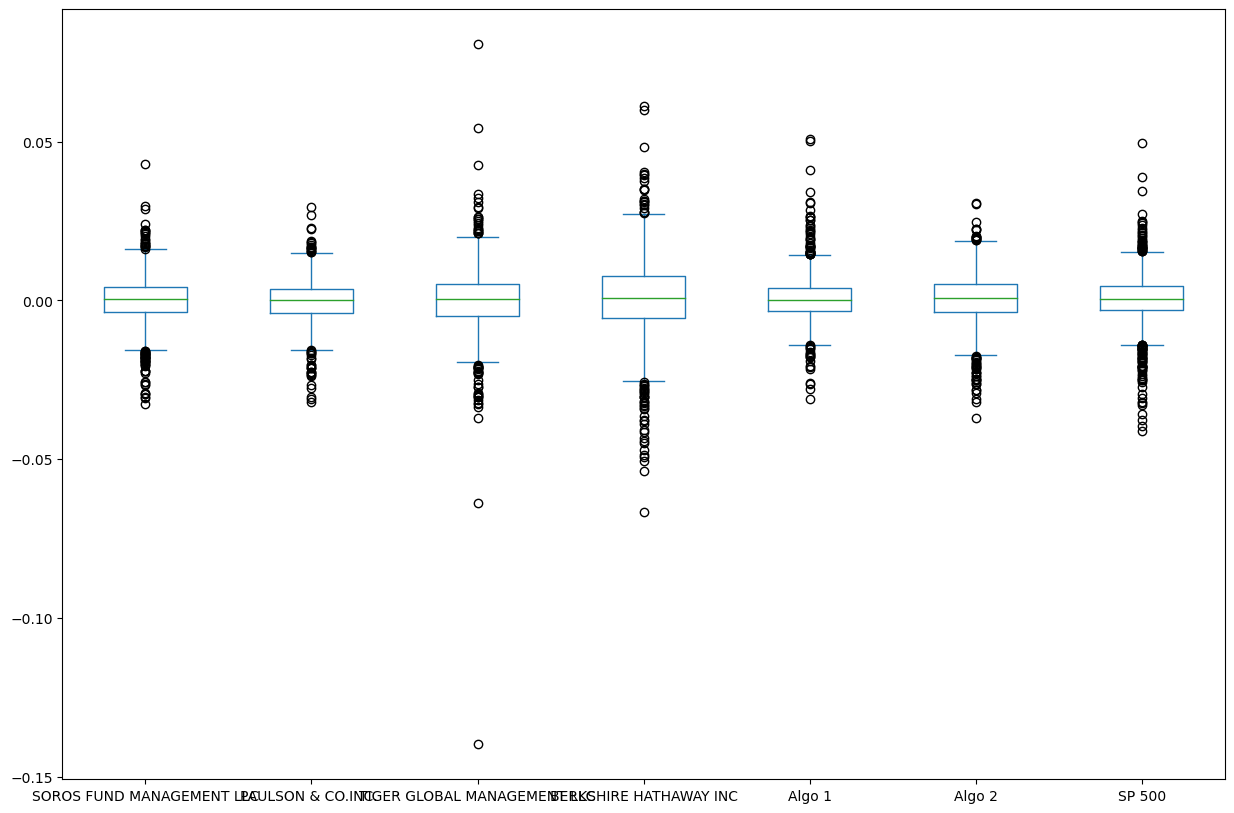

In [48]:
#Risk Analysis
#Determine the risk of each portfolio:

#Create a box plot for each portfolio.
#Calculate the standard deviation for all portfolios
#Determine which portfolios are riskier than the S&P 500
#Calculate the Annualized Standard Deviation
#Create a box plot for each portfolio
# Box plot to visually show risk
all_portfolio.plot.box(figsize=(15,10))

In [18]:
#Calculate Standard Deviations
# Calculate the daily standard deviations of all portfolios
all_portfolio.std()


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP 500                         0.008554
dtype: float64

In [19]:
#Determine which portfolios are riskier than the S&P 500
# Calculate  the daily standard deviation of S&P 500
sp_500_risk = all_portfolio["SP 500"].std()
sp_500_risk

0.008553731597758204

In [20]:
# Determine which portfolios are riskier than the S&P 500
all_portfolio.std() > sp_500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP 500                         False
dtype: bool

In [21]:
#Calculate the Annualized Standard Deviation
# Calculate the annualized standard deviation (252 trading days)
annual_standard = all_portfolio.std()* np.sqrt(252)
annual_standard

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP 500                         0.135786
dtype: float64

<Axes: xlabel='Date'>

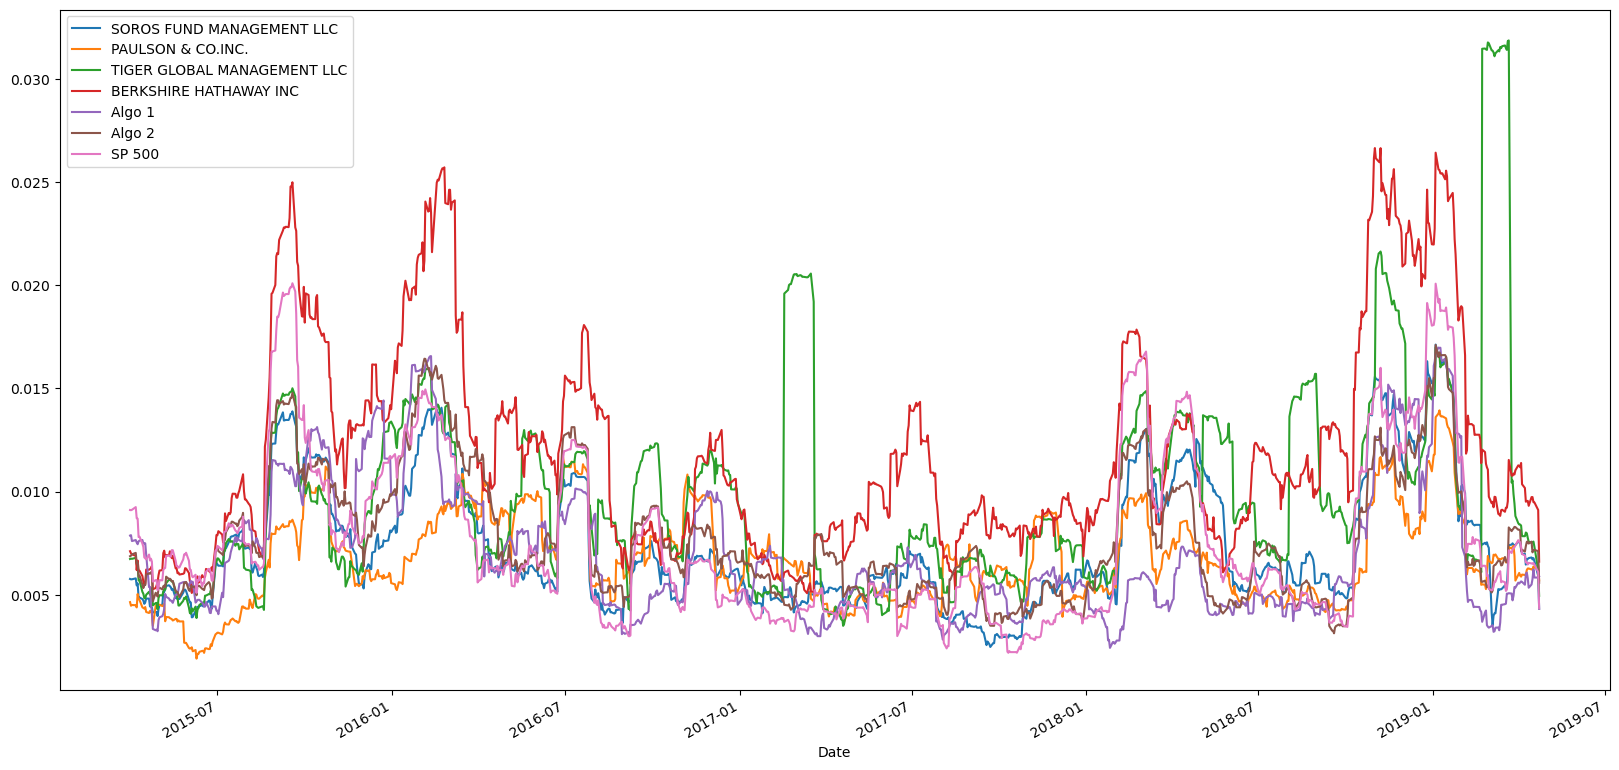

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
all_portfolio.rolling(window=21).std().plot(figsize=(20,10))

In [23]:
#Calculate and plot the correlation
# Calculate the correlation
# Display de correlation matrix
all_portfolio.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<Axes: title={'center': 'Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

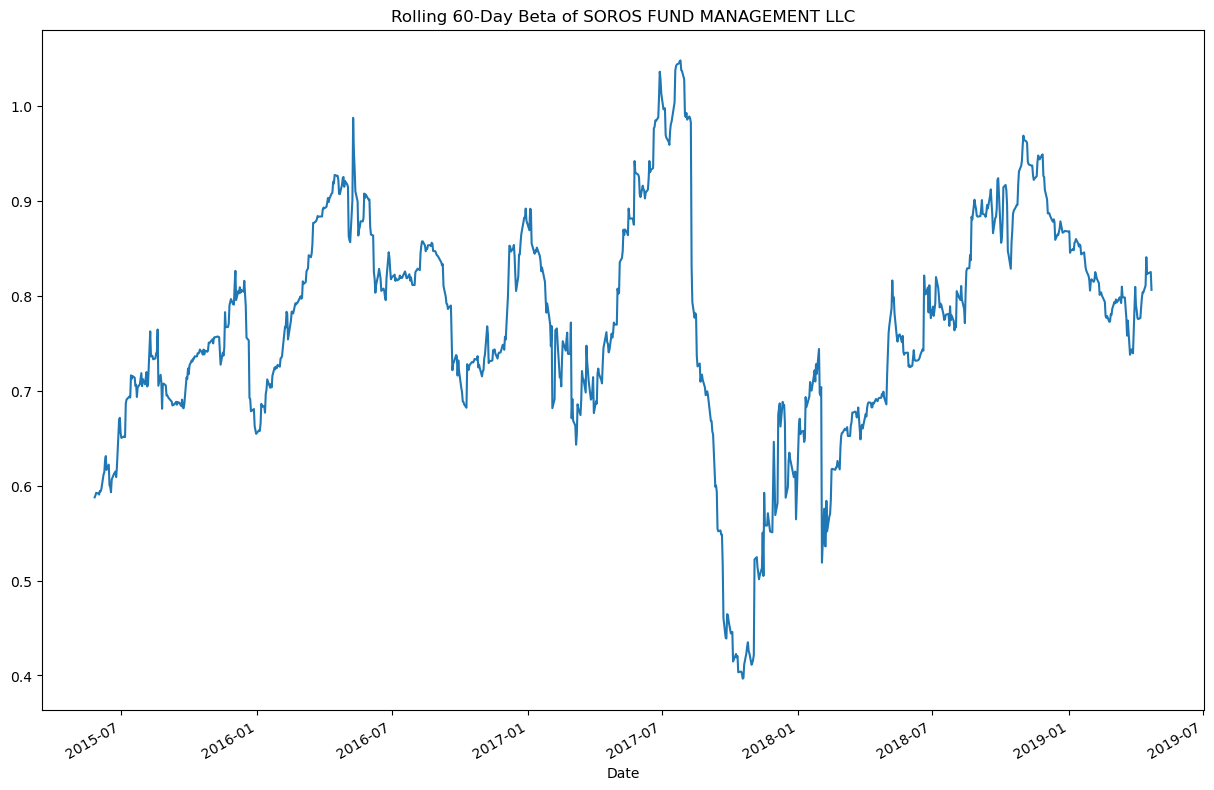

In [49]:
#Calculate and Plot Beta for a chosen portfolio and the S&P 500
# Calculate covariance of a single portfolio
# Calculate variance of S&P 500
# Computing beta
# Plot beta trend

covariance_soros = all_portfolio['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(all_portfolio['SP 500'])
variance_sp500 = all_portfolio['SP 500'].rolling(window=60).var()
rolling_beta_soros = covariance_soros/variance_sp500
#rolling_beta_bh.head()
rolling_beta_soros.plot(figsize=(15, 10), title='Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC')

In [25]:
#Rolling Statistics Challenge: Exponentially Weighted Average
#An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21-day half life for each portfolio, using standard deviation (std) as the metric of interest.

# Use `ewm` to calculate the rolling window
all_portfolio.ewm(halflife=21).std().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083


In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolio.mean() * 252) / (all_portfolio.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP 500                         0.648267
dtype: float64

<Axes: title={'center': 'Portfolio Sharpe Ratio'}>

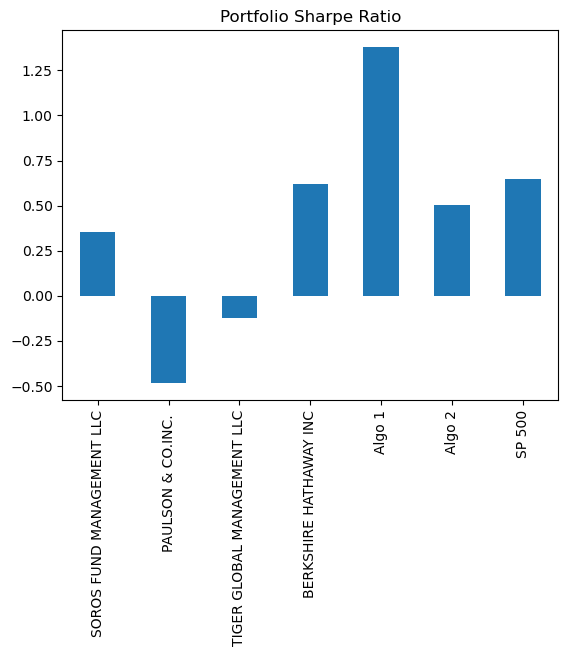

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Portfolio Sharpe Ratio')

In [28]:
appl_historical_csv = Path("../Resources/aapl_historical.csv")
appl_daily_returns = pd.read_csv(appl_historical_csv, index_col='Trade DATE', infer_datetime_format=True,  parse_dates=True, usecols=['Trade DATE','NOCP'])
appl_daily_returns.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [29]:
# Reading data from 2nd stock
cost_historical_csv = Path("../Resources/cost_historical.csv")
cost_daily_returns = pd.read_csv(cost_historical_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
cost_daily_returns.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [30]:
# Reading data from 3rd stock
goog_historical_csv = Path("../Resources/goog_historical.csv")
goog_daily_returns = pd.read_csv(goog_historical_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
goog_daily_returns.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [31]:
# Combine all stocks in a single DataFrame
new_portfolio = pd.concat([appl_daily_returns, cost_daily_returns, goog_daily_returns], axis='columns', join='inner')
new_portfolio.columns = ['APPL', 'COST', 'GOOG']

new_portfolio_return = new_portfolio.sort_index().pct_change() 
new_portfolio_return.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [32]:
# Calculate daily returns
# Drop NAs
# Display sample data
new_portfolio_return.dropna(inplace=True)
new_portfolio_return.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [33]:
#Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
# Set weights
# Calculate portfolio return
# Display sample data
weights = [1/3, 1/3, 1/3]
weighted_portfolio = new_portfolio_return.dot(weights)
weighted_portfolio.sum()

0.14569723027355785

In [34]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_return = pd.concat([weighted_portfolio, whale_daily_returns, sp500_daily_returns], axis='columns', join='inner')
portfolio_return.rename(columns={0:'NEW PORTFOLIO'}, inplace=True)
portfolio_return.head()

,NEW PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632


In [35]:
# Calculate the annualized `std`
annual_portfolio_std = portfolio_return.std() * np.sqrt(252)
annual_portfolio_std

NEW PORTFOLIO                  0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
SP 500                         0.152054
dtype: float64

<Axes: >

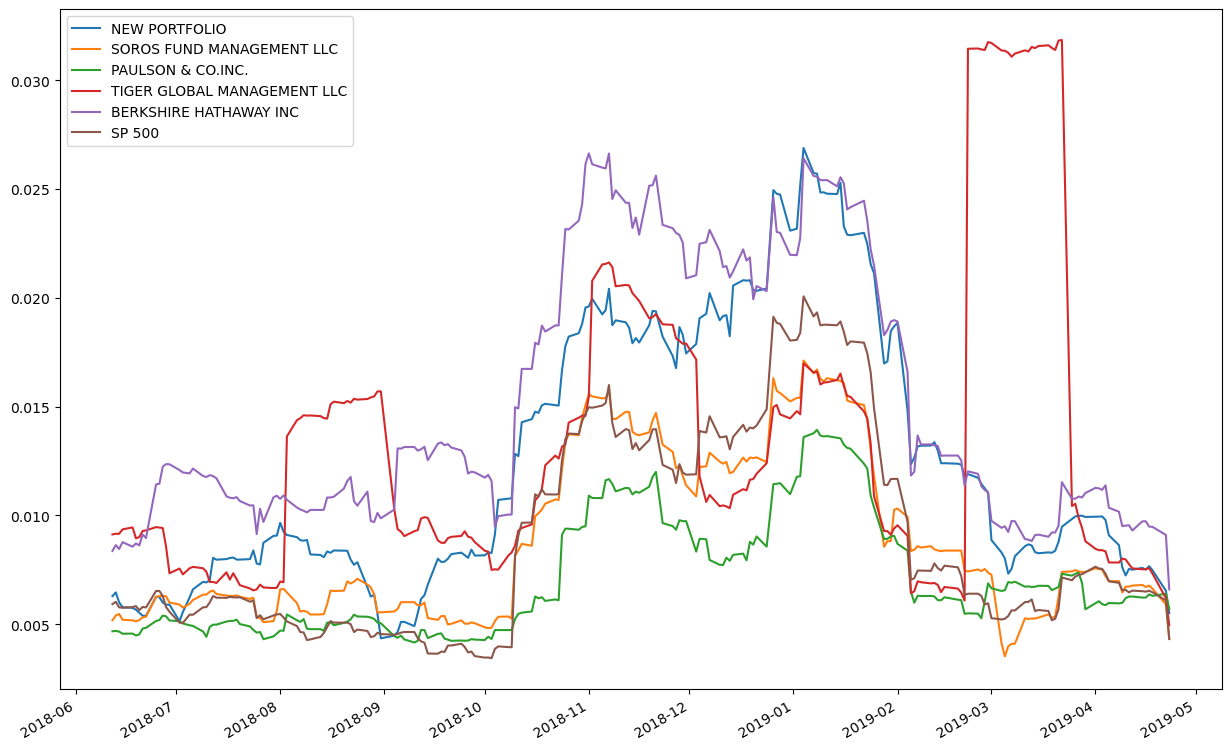

In [50]:
#Calculate and plot rolling std with 21-day window
# Calculate rolling standard deviation
# Plot rolling standard deviation
portfolio_return.rolling(window=21).std().plot(figsize=[15,10])

In [51]:
covariance = portfolio_return['NEW PORTFOLIO'].cov(portfolio_return['SP 500'])
variance = portfolio_return['SP 500'].var()
beta = covariance/variance
beta

1.2127120076458702

In [52]:
annual_portfolio_sharpe_ratio = (portfolio_return.mean() * 252)/(portfolio_return.std() * np.sqrt(252))
annual_portfolio_sharpe_ratio

NEW PORTFOLIO                  0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
SP 500                         0.584820
dtype: float64

<Axes: >

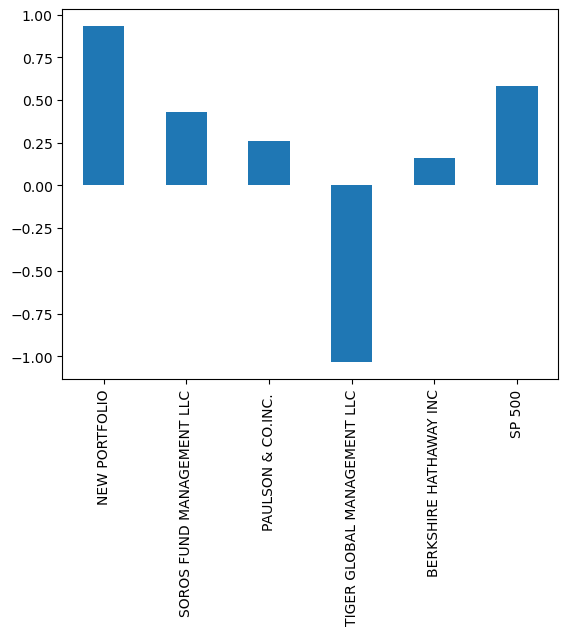

In [53]:
annual_portfolio_sharpe_ratio.plot.bar()

In [54]:
correlation = portfolio_return.corr()
correlation

,NEW PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP 500
NEW PORTFOLIO,1.000000,0.733250,0.644210,0.391972,0.801158,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.876981
PAULSON & CO.INC.,0.644210,0.791962,1.000000,0.485375,0.650758,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.852303
SP 500,0.871875,0.876981,0.766680,0.481030,0.852303,1.000000
